In [2]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
 

In [5]:
conn=sqlite3.connect("../data/articles.db")
df=pd.read_sql("SELECT * FROM cleaned_articles", conn)

conn.close()

print(df.head())
print(df.isnull().sum())

    id                                              title  \
0  183  Analysis: Coinbase Is Buying Bitcoin, Just Don...   
1  185  State of Crypto: Mapping Out the Senate Stable...   
2  186  Lido Proposes a Bold Governance Model to Give ...   
3  187  As Meta Said to Mull Tokens, Senator Warren Ca...   
4  206  Dogecoin Surges 10%, Bitcoin Nears $104K Amid ...   

                                             content summary  \
0  Coinbase (COIN) has its own strategy for BTC o...    None   
1  House Republicans unveiled a discussion draft ...    None   
2  Lido Finance, Ethereum’s largest liquid stakin...    None   
3  Tech titan Meta (META) has reportedly been loo...    None   
4  Bitcoin pushed past the six-figure mark for th...    None   

                                                 url        date  
0  https://www.coindesk.com/news-analysis/2025/05...  2025-05-10  
1  https://www.coindesk.com/news-analysis/2025/05...  2025-05-10  
2  https://www.coindesk.com/tech/2025/05/10/lid

In [7]:
df[df['summary'].notnull()]

,id,title,content,summary,url,date
183,416,How to Make AI Faster and Smarter—With a Littl...,The original versionofthis storyappeared inQua...,L'article présente le parcours inspirant de Ro...,https://www.wired.com/story/improving-deep-lea...,2025-06-02
184,417,Republican Operatives Want to Distance Themsel...,"For weeks, WhiteHouse officials and Republican...",L'article aborde la situation incertaine entou...,https://www.wired.com/story/republicans-distan...,2025-06-02
185,418,"Apple's Big OS Rebrand, OnePlus Embraces AI, a...",All products featured on WIRED are independent...,L'article de presse discute des diverses annon...,https://www.wired.com/story/apples-big-os-rebr...,2025-06-02
186,419,Your Gmail Inbox Is Running Slow. Do These Thi...,"For more than1.8 billion peoplein the world, t...",L'article discute des défis associés à la gest...,https://www.wired.com/story/gmail-inbox-runnin...,2025-06-02
187,420,A Hacker May Have Deepfaked Trump’s Chief of S...,"For years, amysterious figure who goes by the ...",Cet article de presse couvre une série d'événe...,https://www.wired.com/story/trump-chief-staff-...,2025-06-02
188,421,"What Is Google One, and Should You Subscribe?",All products featured on WIRED are independent...,"L'article présente Google One, le service de s...",https://www.wired.com/story/what-is-google-one/,2025-06-02
189,422,Analysts Say Trump Trade Wars Would Harm the E...,This story originallyappeared onInside Climate...,L'article traite des répercussions des politiq...,https://www.wired.com/story/analysts-say-trump...,2025-06-02
190,423,DOGE Is Busier Than Ever—and Trump Says Elon M...,Elon Musk will not be fully exiting the so-cal...,L'article aborde la situation actuelle autour ...,https://www.wired.com/story/doge-elon-musk-rea...,2025-06-02
191,424,Never Drink Alone: A Guide to Turkish Coffee,All products featured on WIRED are independent...,L'article explore en profondeur la culture et ...,https://www.wired.com/story/a-guide-to-turkish...,2025-06-02
192,425,We Bought a ‘Peeing’ Robot Attack Dog From Tem...,All products featured on WIRED are independent...,L'article examine une expérience personnelle a...,https://www.wired.com/story/we-bought-a-peeing...,2025-06-02


In [11]:
df.replace(['', ' ', 'NaN', 'nan'], pd.NA, inplace=True)
df.isnull().sum()

id           0
title        0
content    157
summary    415
url          0
date        16
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       415 non-null    int64 
 1   title    415 non-null    object
 2   content  258 non-null    object
 3   summary  0 non-null      object
 4   url      415 non-null    object
 5   date     399 non-null    object
dtypes: int64(1), object(5)
memory usage: 19.6+ KB


In [18]:
df=df.drop_duplicates(subset=['title','url']).reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       227 non-null    int64 
 1   title    227 non-null    object
 2   content  183 non-null    object
 3   summary  0 non-null      object
 4   url      227 non-null    object
 5   date     211 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.8+ KB


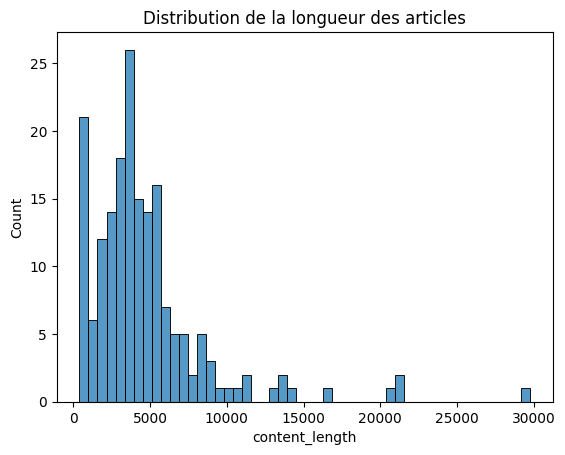

In [17]:
df['content_length']=df['content'].str.len()
sns.histplot(df['content_length'],bins=50)

plt.title('Distribution de la longueur des articles')
plt.show()


In [4]:
conn=sqlite3.connect("../data/articles.db")
cursor=conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables présentes dans la base de données :")
for table in tables:
    print(table[0])


Tables présentes dans la base de données :
articles
sqlite_sequence
cleaned_articles
